In [37]:
import lstm

SEQ_LEN=15

In [38]:
# get Microsoft's stock opening prices and create list of 15 day frames
times = lstm.get_time_series_daily("MSFT", filters=["1. open"], outputsize="full")
# times are returned descending from most recent so should be reversed
vectors = lstm.times_to_vectors(times)[::-1]
frames = lstm.get_frames(vectors, seq_len=SEQ_LEN) # each frame is 15+1 (trend length + prediction target) vectors

print(f"first frame: {frames[0]}")
print(f"second frame: {frames[1]}")

normalized_frames = lstm.normalize_frames(frames)

first frame: [['129.6300'], ['131.2500'], ['129.7500'], ['129.8800'], ['128.6300'], ['130.0600'], ['124.6200'], ['129.5000'], ['132.1300'], ['130.3800'], ['132.3800'], ['134.1300'], ['137.2500'], ['135.5600'], ['138.7500'], ['139.8800']]
second frame: [['131.2500'], ['129.7500'], ['129.8800'], ['128.6300'], ['130.0600'], ['124.6200'], ['129.5000'], ['132.1300'], ['130.3800'], ['132.3800'], ['134.1300'], ['137.2500'], ['135.5600'], ['138.7500'], ['139.8800'], ['142.3800']]


In [39]:
# seperate normalized frames into training and testing data
train, test = lstm.partition_data(normalized_frames, partition_coefficient=0.8)
# split training and testing data into sequences and their targets
x_train, y_train = lstm.seperate_xy(train)
x_test, y_test = lstm.seperate_xy(test)

print(f"training sequence 1: {x_train[0]}, target: {y_train[0]}")
print(f"testing sequence 1: {x_test[0]}, target: {y_test[0]}")

training sequence 1: [[0.0], [0.004569687738004369], [-0.005331302361005319], [-0.009520182787509546], [-0.015613099771515593], [-0.01523229246001534], [-0.021325209444021387], [-0.03313023610053312], [-0.03541507996953552], [-0.03693830921553698], [-0.04150799695354146], [-0.03541507996953552], [-0.03541507996953552], [-0.014851485148514865], [-0.024752475247524885]], target: [-0.028941355674029]
testing sequence 1: [[0.0], [-0.00663449939686378], [-0.012263771612384344], [-0.021712907117008573], [-0.03498190591073591], [-0.014475271411338975], [-0.03518295134700444], [-0.04181745074386822], [-0.04523522316043427], [-0.035987133092078794], [-0.03739445114595896], [-0.018094089264173663], [-0.02613590671491761], [-0.027141133896260605], [-0.01849618013671095]], target: [-0.02975472456775241]


In [40]:
# create LSTM model using the training data
model = lstm.setup_lstm_model(x_train, y_train)
print(model)

compilation time :  0.027917146682739258
Train on 4032 samples, validate on 213 samples
Epoch 1/1
4032/4032 [==============================] - 3s 782us/step - loss: 0.0057 - val_loss: 0.0023


In [41]:
# predict results using the test data
predictions = lstm.predict_sequences_multiple(model, x_test)

final sequence: [[0.0], [-0.016962616822429832], [-0.02439252336448594], [-0.00747663551401867], [-0.008037383177570079], [0.004672897196261738], [-0.006448598130841088], [0.008504672897196253], [0.0073831775700934354], [0.00803738317757019], [-0.0009345794392522366], [0.02850467289719627], [0.044485981308411304], [0.039813084112149566], [0.04383177570093455]]
predicted: [0.03420171]
actual: [0.04710280373831788]


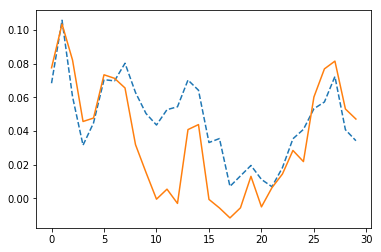

Next predicted normalized value:
current: [0.04710280373831788], next predicted: [0.03837011]


In [44]:
print(f"final sequence: {x_test[-1]}")
print(f"predicted: {predictions[-1]}")
print(f"actual: {y_test[-1]}")
# plot the results of the last month
# (dashed line is prediction)
lstm.plot_results_multiple(predictions[-30:], y_test[-30:])

# get next prediction:
next_seq = normalized_frames[-1][-SEQ_LEN:]
current_val = next_seq[-1]
next_predicted = lstm.predict_sequences_multiple(model, [next_seq])
print("Next predicted normalized value:")
print(f"current: {current_val}, next predicted: {next_predicted[0]}")